In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import os

# **DATA LOADING AND PREPROCESSING**

In [43]:
train_images = []
train_labels = []
val_images = []
val_labels = []
train_path = "../input/hindi-letter-dataset/Dataset/train"
val_path = "../input/hindi-letter-dataset/Dataset/valid"
print("Train data")
margin = 0
removed_labels = [18,23,24]
for label, i in enumerate(sorted(os.listdir(train_path))):
    if label in removed_labels:
        margin+=1
        continue
    print(len(os.listdir(os.path.join(train_path, i))))
    for j in os.listdir(os.path.join(train_path, i)):
        img = cv2.imread(os.path.join(train_path, i, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(64,64,1).astype("float32")/255
        train_images.append(img)
        train_labels.append(label-margin)
        
margin = 0   
print('Validation data')
for label, i in enumerate(sorted(os.listdir(val_path))):
    if label in removed_labels:
        margin+=1
        continue
    print(len(os.listdir(os.path.join(val_path, i))))
    for j in os.listdir(os.path.join(val_path, i)):
        img = cv2.imread(os.path.join(val_path, i, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(64,64,1).astype("float32")/255
        val_images.append(img)
        val_labels.append(label-margin)
margin = 0
val_path = "../input/test-data-ps1/test_labels_updated"
print('Further data')
for label, i in enumerate(sorted(os.listdir(val_path))):
    if label in removed_labels:
        margin+=1
        continue
    print(len(os.listdir(os.path.join(val_path, i))))
    for j in os.listdir(os.path.join(val_path, i)):
        img = cv2.imread(os.path.join(val_path, i, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(64,64,1).astype("float32")/255
        val_images.append(img)
        val_labels.append(label-margin)


Train data
171
171
177
177
177
180
180
180
180
180
180
179
178
179
180
180
179
180
180
180
180
180
180
179
180
180
180
180
180
180
180
174
Validation data
14
15
15
15
15
15
14
15
15
15
14
14
14
14
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
13
13
14
Further data
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


In [44]:
np.unique(val_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [45]:
train_images = np.asarray(train_images)
val_images = np.asarray(val_images)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes = 32)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes = 32)

In [46]:
val_labels.shape

(1044, 32)

In [47]:
train_datagen = ImageDataGenerator(
        width_shift_range = 0.09,
        height_shift_range = 0.09,
        shear_range = 0.3,
        fill_mode = 'nearest')
test_datagen = ImageDataGenerator()
traingen = train_datagen.flow(train_images, train_labels, batch_size=16, shuffle = True)
valgen = test_datagen.flow(val_images, val_labels, batch_size=16)

# **MODEL BUILDING**

In [63]:
model_vc = Sequential()
model_vc.add(Conv2D(128, (6, 6), strides = 1, activation='relu', input_shape=(64, 64, 1)))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(128, (6, 6), strides = 1, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.4))

model_vc.add(Conv2D(128, (4, 4), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(128, (4, 4), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.4))

model_vc.add(Conv2D(128, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(128, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.4))

model_vc.add(Flatten())

model_vc.add(Dense(64, activation = "relu"))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.2))
model_vc.add(Dense(32, activation = "softmax"))

In [64]:
model_vc.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 59, 59, 128)       4736      
_________________________________________________________________
batch_normalization_35 (Batc (None, 59, 59, 128)       512       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 54, 54, 128)       589952    
_________________________________________________________________
batch_normalization_36 (Batc (None, 54, 54, 128)       512       
_________________________________________________________________
dropout_20 (Dropout)         (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 128)       262272    
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 128)      

In [65]:
model_vc.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 1e-3), metrics = ['accuracy'])

In [66]:
callbacks = [
             ModelCheckpoint(
                                filepath='model_vc.h5',
                                save_freq='epoch',
                                save_weights_only=True,
                                mode = "max",
                                monitor = "val_accuracy",
                                verbose=1, 
                                save_best_only = True
                            ),
            EarlyStopping(monitor="val_loss", mode="min", patience=25),
            LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
            #keras.callbacks.TensorBoard(log_dir='./Graph_vowels', histogram_freq=0, write_graph=True, write_images=True)
             
]

In [67]:
history = model_vc.fit(traingen, steps_per_epoch = len(train_images)//16, epochs = 120, 
                       validation_data= valgen, validation_steps = len(val_images)//16, callbacks = callbacks, verbose = 1)

Epoch 1/120
357/357 [==============================] - 10s 26ms/step - loss: 3.4988 - accuracy: 0.1143 - val_loss: 3.3903 - val_accuracy: 0.1135

Epoch 00001: val_accuracy improved from -inf to 0.11346, saving model to model_vc.h5
Epoch 2/120
357/357 [==============================] - 9s 24ms/step - loss: 2.1765 - accuracy: 0.4057 - val_loss: 2.6974 - val_accuracy: 0.2750

Epoch 00002: val_accuracy improved from 0.11346 to 0.27500, saving model to model_vc.h5
Epoch 3/120
357/357 [==============================] - 9s 24ms/step - loss: 1.5282 - accuracy: 0.5721 - val_loss: 3.6967 - val_accuracy: 0.1663

Epoch 00003: val_accuracy did not improve from 0.27500
Epoch 4/120
357/357 [==============================] - 9s 24ms/step - loss: 1.1985 - accuracy: 0.6627 - val_loss: 0.8675 - val_accuracy: 0.7413

Epoch 00004: val_accuracy improved from 0.27500 to 0.74135, saving model to model_vc.h5
Epoch 5/120
357/357 [==============================] - 9s 25ms/step - loss: 0.9932 - accuracy: 0.7241 -

357/357 [==============================] - 9s 24ms/step - loss: 0.1231 - accuracy: 0.9623 - val_loss: 0.1522 - val_accuracy: 0.9490

Epoch 00039: val_accuracy did not improve from 0.96058
Epoch 40/120
357/357 [==============================] - 9s 24ms/step - loss: 0.1255 - accuracy: 0.9585 - val_loss: 0.1356 - val_accuracy: 0.9577

Epoch 00040: val_accuracy did not improve from 0.96058
Epoch 41/120
357/357 [==============================] - 9s 25ms/step - loss: 0.1280 - accuracy: 0.9610 - val_loss: 0.1211 - val_accuracy: 0.9596

Epoch 00041: val_accuracy did not improve from 0.96058
Epoch 42/120
357/357 [==============================] - 9s 24ms/step - loss: 0.1307 - accuracy: 0.9619 - val_loss: 0.1566 - val_accuracy: 0.9481

Epoch 00042: val_accuracy did not improve from 0.96058
Epoch 43/120
357/357 [==============================] - 9s 25ms/step - loss: 0.1070 - accuracy: 0.9668 - val_loss: 0.1167 - val_accuracy: 0.9558

Epoch 00043: val_accuracy did not improve from 0.96058
Epoch 44


Epoch 00079: val_accuracy did not improve from 0.96442
Epoch 80/120
357/357 [==============================] - 9s 24ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.1064 - val_accuracy: 0.9587

Epoch 00080: val_accuracy did not improve from 0.96442
Epoch 81/120
357/357 [==============================] - 9s 24ms/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.1027 - val_accuracy: 0.9587

Epoch 00081: val_accuracy did not improve from 0.96442
Epoch 82/120
357/357 [==============================] - 9s 25ms/step - loss: 0.0774 - accuracy: 0.9756 - val_loss: 0.1026 - val_accuracy: 0.9567

Epoch 00082: val_accuracy did not improve from 0.96442
Epoch 83/120
357/357 [==============================] - 9s 26ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.1124 - val_accuracy: 0.9558

Epoch 00083: val_accuracy did not improve from 0.96442
Epoch 84/120
357/357 [==============================] - 9s 24ms/step - loss: 0.0640 - accuracy: 0.9811 - val_loss: 0.1065 - val_accuracy: 0.

In [68]:
model_vc.load_weights("model_vc.h5")
model_vc.save("98.2-96.5.h5")

In [69]:
model_vc.evaluate(valgen)

66/66 [==============================] - 0s 6ms/step - loss: 0.0965 - accuracy: 0.9646


[0.09653573483228683, 0.9645593762397766]

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [59]:
import itertools
def plot_confusion_matrix(cm, classes=['0','1'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.91      0.97      0.94        33
           2       1.00      0.88      0.94        33
           3       0.86      0.91      0.88        33
           4       1.00      0.97      0.98        33
           5       0.84      0.97      0.90        33
           6       1.00      1.00      1.00        32
           7       0.94      1.00      0.97        33
           8       1.00      0.97      0.98        33
           9       1.00      1.00      1.00        33
          10       0.94      0.91      0.92        32
          11       0.97      0.91      0.94        32
          12       0.97      1.00      0.98        32
          13       0.97      0.91      0.94        32
          14       0.97      1.00      0.99        33
          15       0.97      0.88      0.92        33
          16       0.97      0.97      0.97        33
          17       0.97    

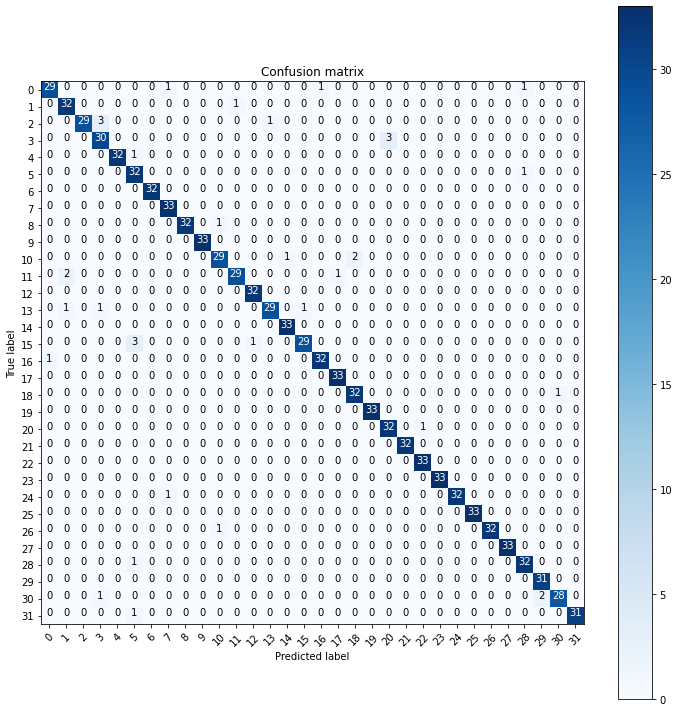

In [70]:
predict = model_vc.predict(val_images)
pred_labs  =np.argmax(predict, axis =1)
confusion = confusion_matrix(np.argmax(val_labels, axis=1), pred_labs)
report = classification_report(np.argmax(val_labels, axis=1), pred_labs)

print(report)
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion, classes=list(range(0,32)),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.savefig('confuse')

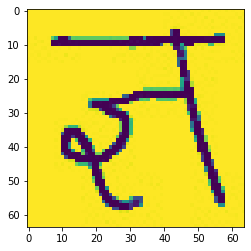

In [95]:
plt.imshow(val_images[np.argmax(val_labels, axis=1)==23][0][:,:,0])